<a href="https://colab.research.google.com/github/e-pyrom/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/PE__LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Continuous vs. categorical variables

In [60]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [61]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3:'third' })
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


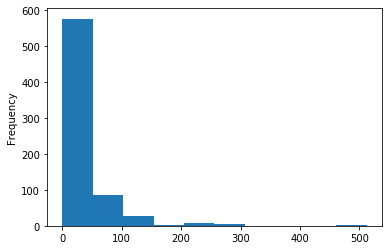

In [62]:
#Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

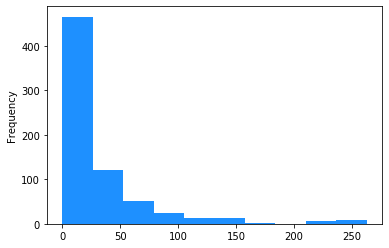

In [63]:
#Remove two extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [0]:
#A continuous variable can be converted to a categorical var using binning.
farebins=[0, 8, 15, 33, 512]
farelabels=['low', 'med', 'high', 'vhigh']

df['fare_groups']=pd.cut(df['Fare'],
                        bins=farebins,
                        labels=farelabels)

In [65]:
#let's see
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

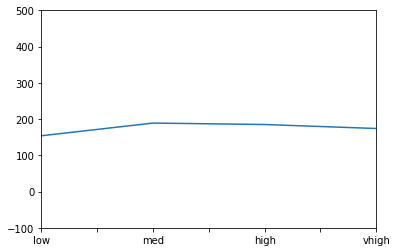

In [66]:
#Sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot(ylim=(-100,500));

Display a single continuous variable

In [67]:
df.shape

(709, 8)

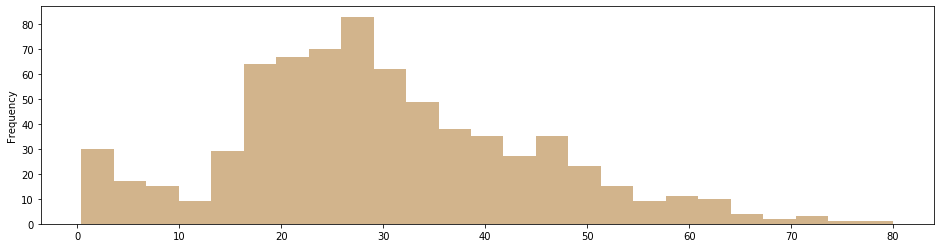

In [68]:
#Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan')

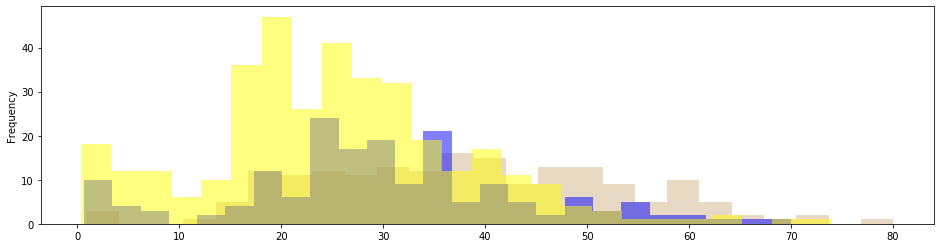

In [69]:
#Stacked Histogram of continuous variable, broken out by categorical variable
df[df['cabin_class']=='first']        ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan', alpha=0.5);
df[df['cabin_class']=='second']       ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='blue', alpha=0.5);
df[df['cabin_class']=='third']       ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='yellow', alpha=0.5);

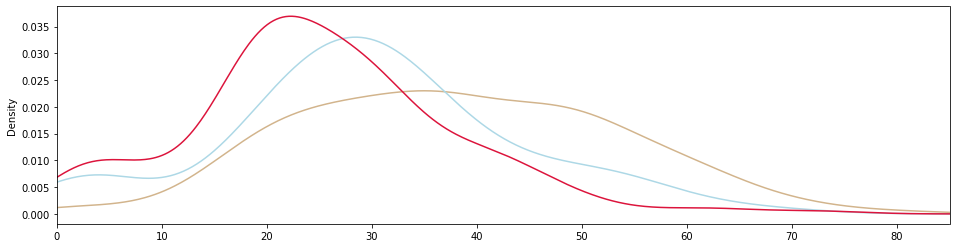

In [70]:
#But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['cabin_class']=='first']        ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='tan');
df[df['cabin_class']=='second']       ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='lightblue');
df[df['cabin_class']=='third']       ['Age'].plot(kind='density', xlim=(0,85), figsize=(16,4), color='crimson');

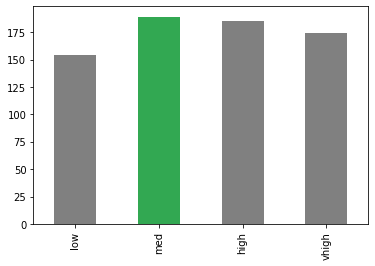

In [71]:
#Bar chart. Use colors to make a particular value 'pop'!
myresults=df['fare_groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['gray', '#32a852', 'gray', 'gray']);

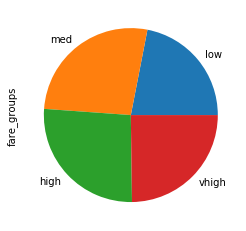

In [72]:
#pie chart
myresults.plot(kind='pie')

Compare two categorical variables

In [73]:
#compare two categorical variable using crosstab
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


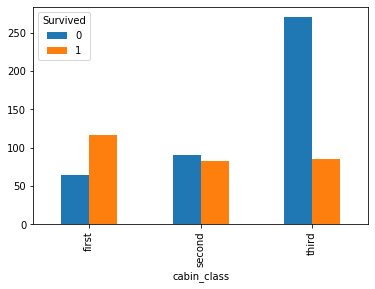

In [74]:
#Make that into a bar chart.
cab_death.plot(kind='bar');

In [75]:
#Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


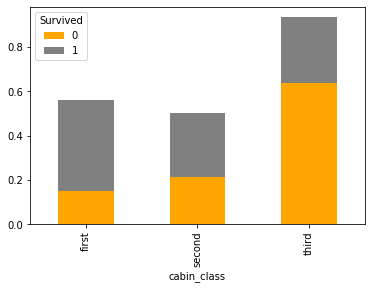

In [76]:
#Make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [77]:
#Crosstab with row percents.
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


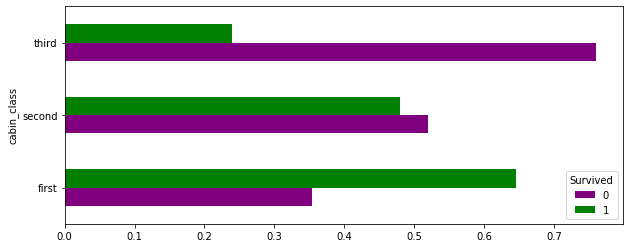

In [78]:
#A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind='barh', figsize=(10,4), color=['purple', 'green'])

Compare a categorical and continuous variable

In [79]:
#Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [80]:
#Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age=df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

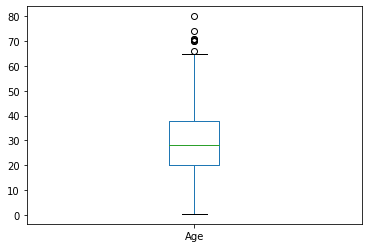

In [81]:
#To visualize a single continuous variable, you can just ust '.plot' with 'kind=box'
df['Age'].plot(kind='box');

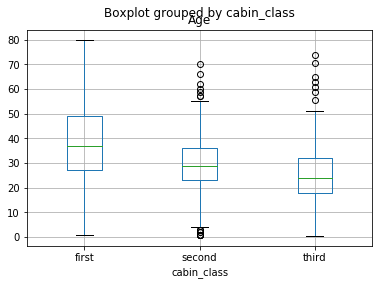

In [28]:
#But to break out a continuous variable by a categorical variable, use '.boxplot'
df.boxplot(column='Age', by='cabin_class');

In [0]:
#Compare two or three continuous variables

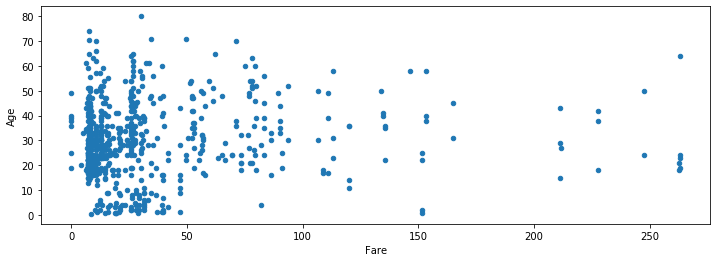

In [83]:
#Two continuous variables: age by fare
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

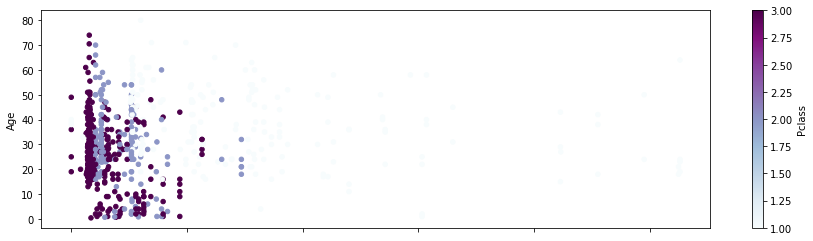

In [84]:
#Three variables: age, fare and cabin class (color can be either continuous or categorical here).
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='BuPu', figsize=(15,4));

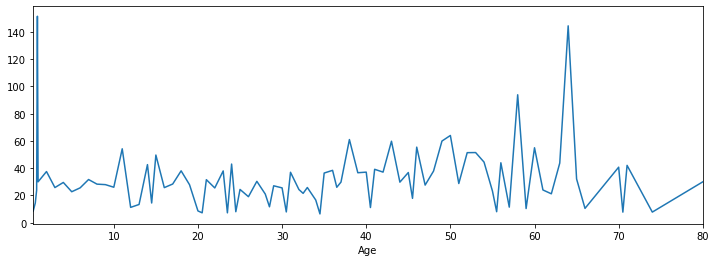

In [85]:
#Line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

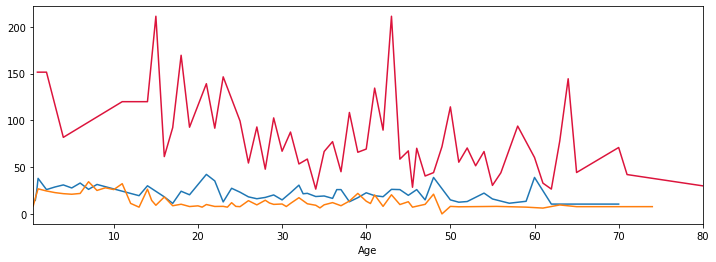

In [86]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
df[df['cabin_class']=='first'].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color='crimson');
df[df['cabin_class']=='second'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));
df[df['cabin_class']=='third'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

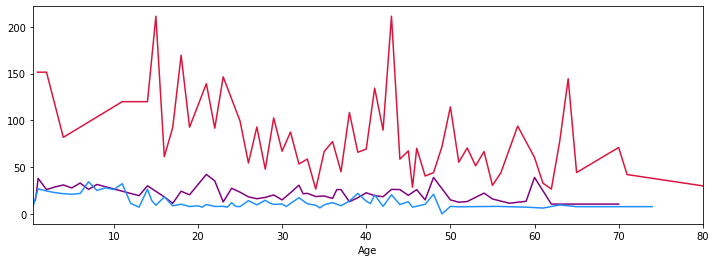

In [87]:
#Do this more elegantly with a list
#Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
cab_classes=['first', 'second', 'third']
#Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.

for x in [0,1,2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x]);

Compare multiple continuous variables

In [88]:
#Correlation Matrix
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


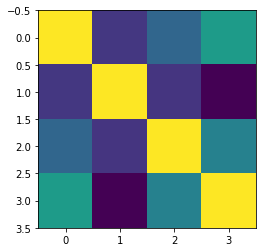

In [89]:
#Dispay the correlation matrix as a heatmap
plt.imshow(corr_matrix)

But this actually is easier and better looking if you use seaborn code

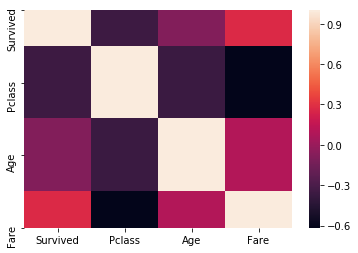

In [90]:
#Seaborn.
sns.heatmap(corr_matrix);

Intro to Matplotlib

**The data we want to plot:**

In [0]:
x = np.linspace(0, 5, 11)
y = x **2

In [92]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [93]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

**Basic Matplotlib Commands**

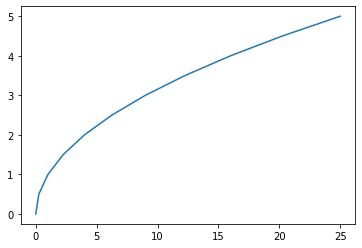

In [94]:
#A very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

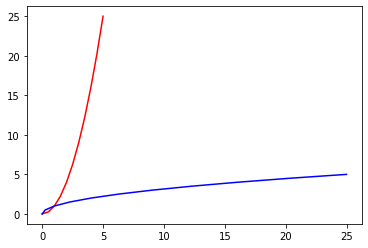

In [95]:
#You can two 'plt' plots together (and let's add some color).
plt.plot(x, y, 'r');
plt.plot(y, x, 'b');

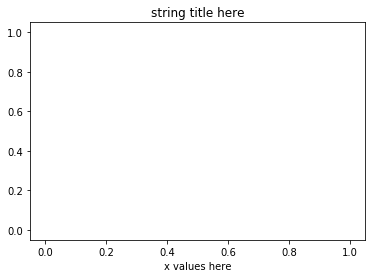

In [96]:
#Now add some labels, plus a little texture.
plt.plot()
#plt.plot(x, y , 'r')
#plt.plot(y, x, 'b')
plt.xlabel('x values here')
#plt.ylabel ('y vals here')
plt.title('string title here');

**Creating Multiplots on Same Canvas**

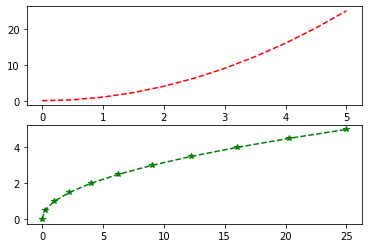

In [97]:
#The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(2,1,1)
plt.plot(x, y, 'r--')
plt.subplot(2,1,2)
plt.plot(y,x, 'g*--');

**Matplotlib Object Oriented Method**

**The .figure() method**:
To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'set figure')

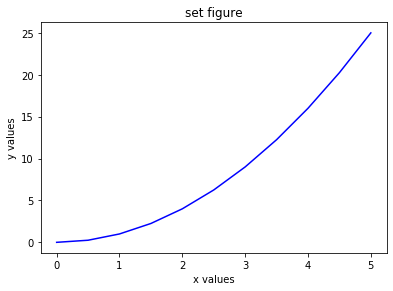

In [98]:
#Creat Figure (empty canvas)
fig = plt.figure()
#Add swt of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) #left, bottom, width, height (range 0 to 1)

#Plot on that set of axes
axes.plot(x,y, 'b')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('set figure')
#Notice the use of set_to begin methods

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed and we can easily add more than one axis to the figure:

Text(0.5, 1.0, 'set figure')

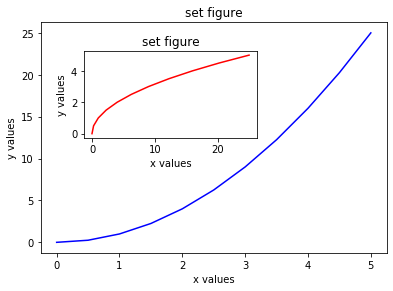

In [99]:
#Creates blank canvas
fig = plt.figure()
#Add set of axes to figure
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

#Plot on that set of axes
axes1.plot(x,y, 'b')
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('set figure')

axes2.plot(y,x, 'r')
axes2.set_xlabel('x values')
axes2.set_ylabel('y values')
axes2.set_title('set figure')
#Notice the use of set_ to begin methods

**The subplots() method**

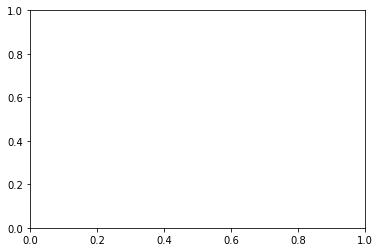

In [100]:
fig, ax = plt.subplots()

is more concise than this:

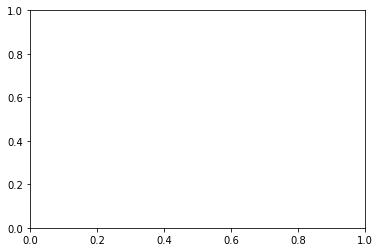

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)

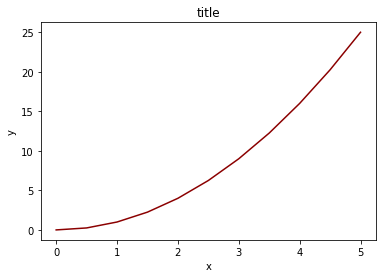

In [102]:
#Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1) #The default it '(1,1)' so you don't actually have to specify this.

#Now use the axes object to add stuff to plot
axes.plot(x,y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


Then you can specify the number of rows and columns when creating the subplots() object:

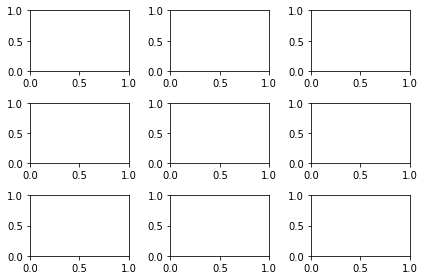

In [103]:
#Empty canvas 1 by 2 subplots
#the parameter labels 'nrows' and 'ncols' are optional.
fig, axes = plt.subplots(nrows=3, ncols=3)
fig
#more about '.tight_layout()' below.
plt.tight_layout() 

In [104]:
#Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafa48d0f60>,
      dtype=object)

We can iterate through this array:

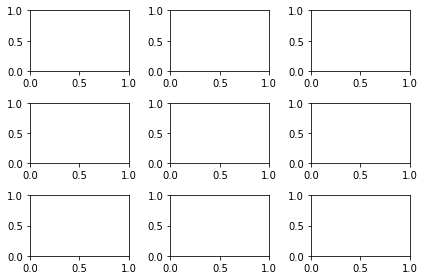

In [105]:
for a in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x vals')
    ax.set_ylabel('y')
    ax.set_title('title')
  
#Display the figure object
fig

Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the figsize ans dpi keywork arguments.


*   figsize is a tuple of the width and height of the figure in inches

*   dpi is the dots-per-inch (pixel per inch)



In [107]:
fig = plt.figure(figsize=(8,4), dpi=100)
fig

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

The same arguments can alsp be passed to layout managers, such as the subplots function:

Text(0.5, 1.0, 'title')

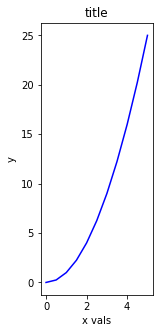

In [111]:
fig, axes = plt.subplots(figsize=(2,5))
axes.plot(x, y, 'b')
axes.set_xlabel('x vals')
axes.set_ylabel('y')
axes.set_title('title')

Saving figures

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

To save a figure to a file we can use the savefig methog in  the Figure class:

In [0]:
fig.savefig('myfile.png')

Here we can also optionally specify the DPI and choose between different output formats:

In [0]:
fig.savefig('myfile1.png', dpi=200)

Legends, labels and titles

Decorate a figure with titles, axis labels, and legends.

**Figure titles**

In [115]:
axes.set_title('title')

Text(0.5, 1, 'title')

**Axes labels**

Set_xlabel and set_ylabel

In [116]:
axes.set_xlabel('values')

Text(0.5, 24.0, 'values')

**Legends**

Use label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

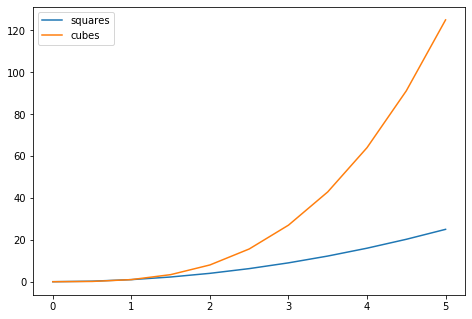

In [120]:
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
ax.plot(x, x**2, label='squares')
ax.plot(x, x**3, label='cubes')
ax.legend();

Colors with MatLab like syntax

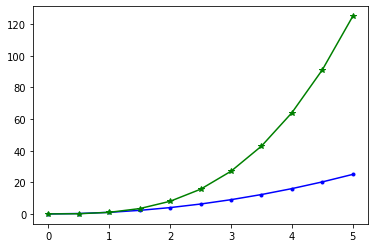

In [121]:
#MATLAB style line color and style
fig, ax = plt.subplots()

#Blue line with dots
ax.plot(x, x**2, 'b.-')

#Green dashed line
ax.plot(x, x**3, 'g*-')


Colors with the color = parameter

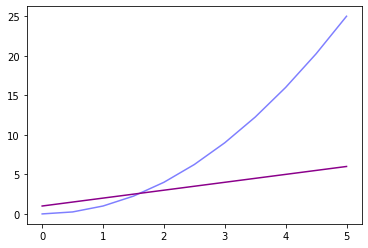

In [124]:
#half-transparent
fig, ax = plt.subplots()

#blue line with dots
ax.plot(x, x**2, color='blue', alpha=0.5)

#green dashed line
ax.plot(x, x+1, color='#8B008B')

Change the line width using linewidth or lw keyword argument:

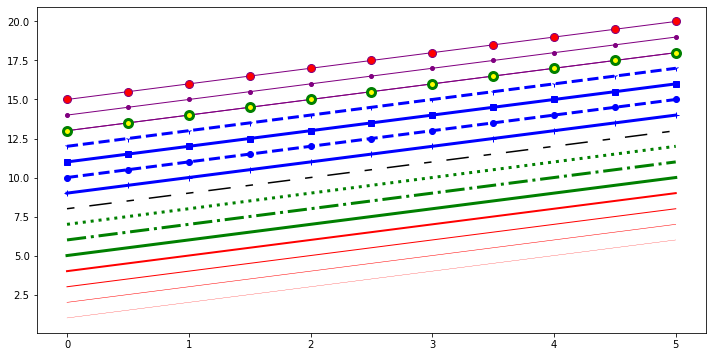

In [131]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='red', linewidth=0.25)
ax.plot(x, x+2, color='red', linewidth=0.50)
ax.plot(x, x+3, color='red', linewidth=1.00)
ax.plot(x, x+4, color='red', linewidth=2.00)

#possible linestype options:
ax.plot(x, x+5, color='green', lw=3, linestyle='-')
ax.plot(x, x+6, color='green', lw=3, ls='-.')
ax.plot(x, x+7, color='green', lw=3, ls=':')

#custom dash
line, = ax.plot(x, x+8, color='black', lw=1.50)
line.set_dashes([5, 10, 15, 10]) #format: line length, space length, ...

#possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+9, color='blue', lw=3, ls='-', marker='+')
ax.plot(x, x+10, color='blue', lw=3, ls='--', marker='o')
ax.plot(x, x+11, color='blue', lw=3, ls='-', marker='s')
ax.plot(x, x+12, color='blue', lw=3, ls='--', marker='1')

#marker size and color
ax.plot(x, x+13, color='purple', lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color='purple', lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color='purple', lw=1, ls='-', marker='o', markersize=8, markerfacecolor='red')
ax.plot(x, x+13, color='purple', lw=1, ls='-', marker='o', markersize=8,
       markerfacecolor='yellow', markeredgewidth=3, markeredgecolor='green');

**Plot range**

We can configure the ranges of the axes using the set_ylim and set_xlim methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges:

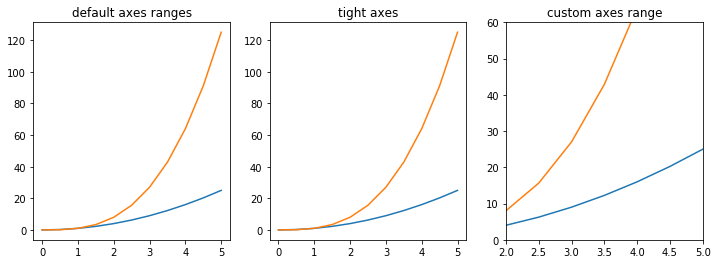

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0,60])
axes[2].set_xlim([2, 5])
axes[2].set_title('custom axes range');

**PART TWO**

In [137]:
pt2_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS15V8lYPUc_OH4OBss6d8NPGRnCH1lAlBBY4FYWcK6cm6iVM8dXE_4KMFOUybRe-cVvDg7ap46FPig/pub?gid=39569490&single=true&output=csv&/impeachment-polls.csv'
pt2_df = pd.read_csv(pt2_url)
pt2_df.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,Yes,No,Unsure,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,37.0,59.0,4.0,232.0,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,37.0,56.0,6.0,260.0,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,40.0,55.0,6.0,240.0,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,49.0,46.0,5.0,251.0,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,43.0,51.0,5.0,483.0,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here